In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def probability(p_prev, k, y):
    Z = 1+np.power(p_prev, k)*(np.exp(y) - 1)
    return 1 - np.power(p_prev, k)*np.exp(y)/Z

In [3]:
def fixed_point_iter(y, k, p0, tol=1e-8, maxiter=500, damp=0.5):
    """Fixed point iteration for f(x) = x."""
    p = p0
    for i in range(maxiter):
        pnew = probability(p, k, y)*damp + p*(1-damp)
        if abs(pnew - p) < tol:
            return pnew
        p = pnew


In [11]:
y_space = np.linspace(0.001, 12, 500)
k = 3
p0 = 0.5
p_space = np.zeros_like(y_space)
for i, y in enumerate(y_space):
    p_space[i] = fixed_point_iter(y, k, p0)


In [12]:
def free_entropy(y, p, k):
    numerator = np.log(1+(np.exp(y)-1)*np.power(p, k+1))-(k+1)/2*np.log(1+(np.exp(-y)-1)*(1-p)**2)
    return -numerator/y

In [13]:
free_entropy_space = np.zeros_like(y_space)
for i, y in enumerate(y_space):
    free_entropy_space[i] = free_entropy(y, p_space[i], k)

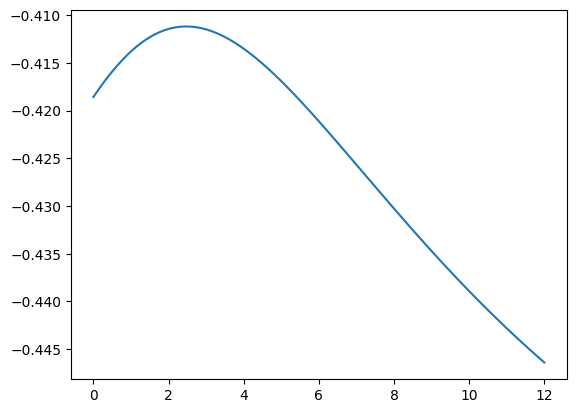

In [14]:
plt.plot(y_space, free_entropy_space)

In [16]:
free_entropy_max = np.max(free_entropy_space)

In [17]:
rho_s = -1*free_entropy_max
print(rho_s)

0.41119460015767745


In [27]:
k_list = [3, 4, 5, 6, 7, 8, 9, 10, 15]
y_space = np.linspace(1, 12, 1000)
p0 = 0.5

In [30]:
rho_s_list = []
for k in tqdm(k_list):
    p_space = np.zeros_like(y_space)
    for i, y in enumerate(y_space):
        p_space[i] = fixed_point_iter(y, k-1, p0)
    free_entropy_space = np.zeros_like(y_space)
    for i, y in enumerate(y_space):
        free_entropy_space[i] = free_entropy(y, p_space[i], k-1)
    free_entropy_max = np.nanmax(free_entropy_space)
    rho_s = -1*free_entropy_max
    rho_s_list.append(rho_s)
    

100%|██████████| 9/9 [00:06<00:00,  1.43it/s]


In [31]:
for i, k in enumerate(k_list):
    print(k, rho_s_list[i])

3 0.4508596580405643
4 0.4111945766827175
5 0.3792681985687799
6 0.3529845846840677
7 0.3308843576362304
8 0.3119725747396613
9 0.2955539107800248
10 0.281278829679862
15 0.23260574790265476
